In [ ]:
# Import Libraries

import numpy as np  #Linear Algebra
import pandas as pd #Data Processing

from sklearn.preprocessing import LabelEncoder #One-Hot Encoding
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

#Visualization and Plots
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Reading the data
iris_data = pd.read_csv('/content/sample_data/Maternal Health Risk Data Set.csv')

In [ ]:
iris_data

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk
...,...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80,high risk
1010,55,120,90,18.0,98.0,60,high risk
1011,35,85,60,19.0,98.0,86,high risk
1012,43,120,90,18.0,98.0,70,high risk


In [ ]:
# Check few records
iris_data.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [ ]:
# get to know about number of species (classes)
iris_data['RiskLevel'].unique()

array(['high risk', 'low risk', 'mid risk'], dtype=object)

In [ ]:
# if there is any NAN value
iris_data.isnull().values.any()

False

In [ ]:
# check the distribution of the class 
iris_data['RiskLevel'].value_counts()

low risk     406
mid risk     336
high risk    272
Name: RiskLevel, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='RiskLevel', ylabel='count'>

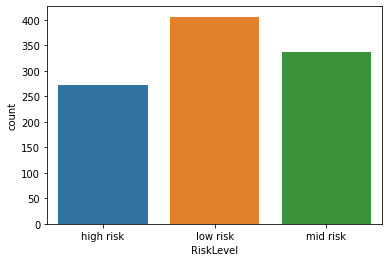

In [ ]:
sns.countplot(iris_data['RiskLevel'])

In [ ]:
for column in iris_data.columns:
    if iris_data[column].dtype == np.number:
        continue
iris_data[column] = LabelEncoder().fit_transform(iris_data[column])      

<ipython-input-13-cd60a9dde174>:2: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if iris_data[column].dtype == np.number:


In [ ]:
iris_data.dtypes

Age              int64
SystolicBP       int64
DiastolicBP      int64
BS             float64
BodyTemp       float64
HeartRate        int64
RiskLevel        int64
dtype: object

In [ ]:
iris_data.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,0
1,35,140,90,13.0,98.0,70,0
2,29,90,70,8.0,100.0,80,0
3,30,140,85,7.0,98.0,70,0
4,35,120,60,6.1,98.0,76,1


In [ ]:
#seperating Features

X = iris_data.drop(['RiskLevel'],axis = 1)
y = iris_data['RiskLevel']

In [ ]:
X

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
0,25,130,80,15.0,98.0,86
1,35,140,90,13.0,98.0,70
2,29,90,70,8.0,100.0,80
3,30,140,85,7.0,98.0,70
4,35,120,60,6.1,98.0,76
...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80
1010,55,120,90,18.0,98.0,60
1011,35,85,60,19.0,98.0,86
1012,43,120,90,18.0,98.0,70


In [ ]:
y

0       0
1       0
2       0
3       0
4       1
       ..
1009    0
1010    0
1011    0
1012    0
1013    2
Name: RiskLevel, Length: 1014, dtype: int64

In [ ]:
#Splitting Dataset into test and train

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [ ]:
#Selecting different Ks in range [1,12] and choose the one with high accuracy

k_range = list(range(1,12))
acc = []
for i in k_range:
    
    knn = KNeighborsClassifier(n_neighbors=i).fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc.append(metrics.accuracy_score(y_test, y_pred))

In [ ]:
acc

[0.8459016393442623,
 0.7836065573770492,
 0.7508196721311475,
 0.7377049180327869,
 0.7213114754098361,
 0.7180327868852459,
 0.7114754098360656,
 0.7114754098360656,
 0.6885245901639344,
 0.7016393442622951,
 0.7016393442622951]

In [ ]:
knn = KNeighborsClassifier(n_neighbors=1).fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [ ]:
metrics.accuracy_score(y_test, y_pred)

0.8459016393442623